In [ ]:
# Dataset link: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [10]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/train",
    shuffle = True,
    seed = 16,
    image_size = (244, 244),
    batch_size = 32
)

Found 20000 files belonging to 2 classes.


In [11]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/test",
    shuffle = True,
    seed = 16,
    image_size = (244, 244),
    batch_size = 32
)

Found 5000 files belonging to 2 classes.


In [12]:
class_names = training_ds.class_names
class_names

['cats', 'dogs']

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [5]:
# Load the dataset
# Make sure you have loaded the training and testing datasets as 'training_ds' and 'testing_ds' respectively.

# Preprocess the dataset for VGG16 (Rescale and resize)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
training_ds = training_ds.map(lambda x, y: (preprocess_input(x), y))
testing_ds = testing_ds.map(lambda x, y: (preprocess_input(x), y))

# Load the VGG16 model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the base model layers (optional)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training dataset
epochs = 5  # Adjust the number of epochs as needed
model.fit(training_ds, epochs=epochs, validation_data=testing_ds)


Epoch 1/5
625/625 [==============================] - 106s 154ms/step - loss: 0.4639 - accuracy: 0.9724 - val_loss: 0.0614 - val_accuracy: 0.9796
Epoch 2/5
625/625 [==============================] - 95s 150ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0622 - val_accuracy: 0.9834
Epoch 3/5
625/625 [==============================] - 95s 150ms/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 0.0972 - val_accuracy: 0.9834
Epoch 4/5
625/625 [==============================] - 94s 149ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0842 - val_accuracy: 0.9826
Epoch 5/5
625/625 [==============================] - 94s 149ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.1336 - val_accuracy: 0.9768


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

1/1 [==============================] - 0s 16ms/step


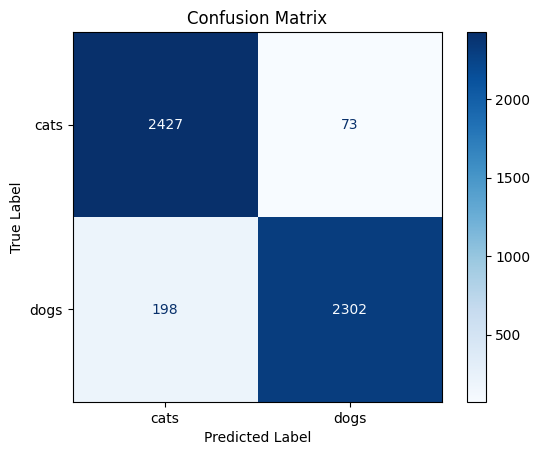

In [13]:
# Assuming you have model predictions and true labels in binary_predictions and true_labels variables respectively.
# binary_predictions and true_labels should be numpy arrays.
true_labels = []
binary_predictions = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    binary_predictions.extend((predictions > 0.5).astype(int).flatten())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
